Nama : Qubussima Faeroz Furqona

NIM : 22.11.5155

Kelas : 22 IF-10

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/UAS_DatMin/Chronic_Kidney_Dsease.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential


# 1. Data Preprocessing

In [ ]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


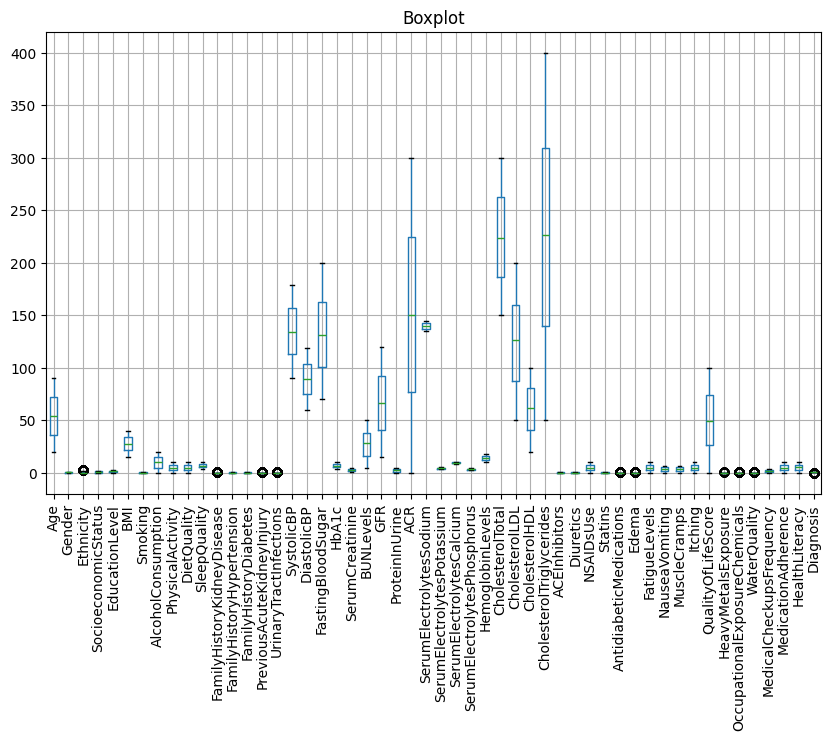

In [ ]:
# Visualisasi outlier dengan boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# 2. EDA (Exploraory Data Analisis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   Ethnicity                      1659 non-null   int64  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int64  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int64  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int64  
 12  FamilyHistoryHypertension      1659 non-null   i

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1659.0,54.441230,20.549757,20.000000,36.000000,54.000000,72.000000,90.000000
Gender,1659.0,0.515371,0.499914,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,1659.0,0.713080,1.000430,0.000000,0.000000,0.000000,1.000000,3.000000
SocioeconomicStatus,1659.0,0.977697,0.776686,0.000000,0.000000,1.000000,2.000000,2.000000
EducationLevel,1659.0,1.693189,0.910611,0.000000,1.000000,2.000000,2.000000,3.000000
BMI,1659.0,27.620049,7.288670,15.033888,21.471449,27.652077,34.015849,39.993532
Smoking,1659.0,0.292948,0.455252,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,1659.0,9.969831,5.798787,0.021740,5.051156,9.951503,14.967100,19.992713
PhysicalActivity,1659.0,5.024247,2.866274,0.001186,2.555038,5.072395,7.460563,9.998167
DietQuality,1659.0,5.028544,2.865777,0.002407,2.558443,4.989810,7.428290,9.998927


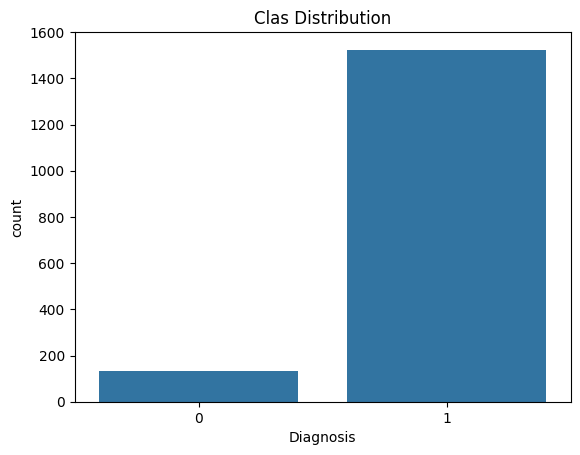

In [ ]:
# Plot diagnosis distribution
sns.countplot(x=y)
plt.title("Clas Distribution")
plt.show()


In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

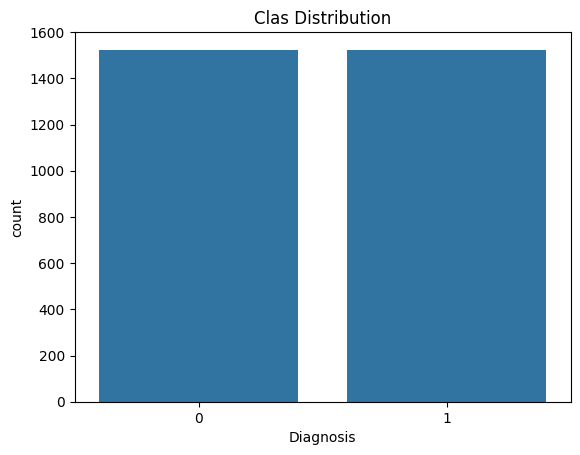

In [ ]:
# Plot diagnosis distribution
sns.countplot(x=y)
plt.title("Clas Distribution")
plt.show()

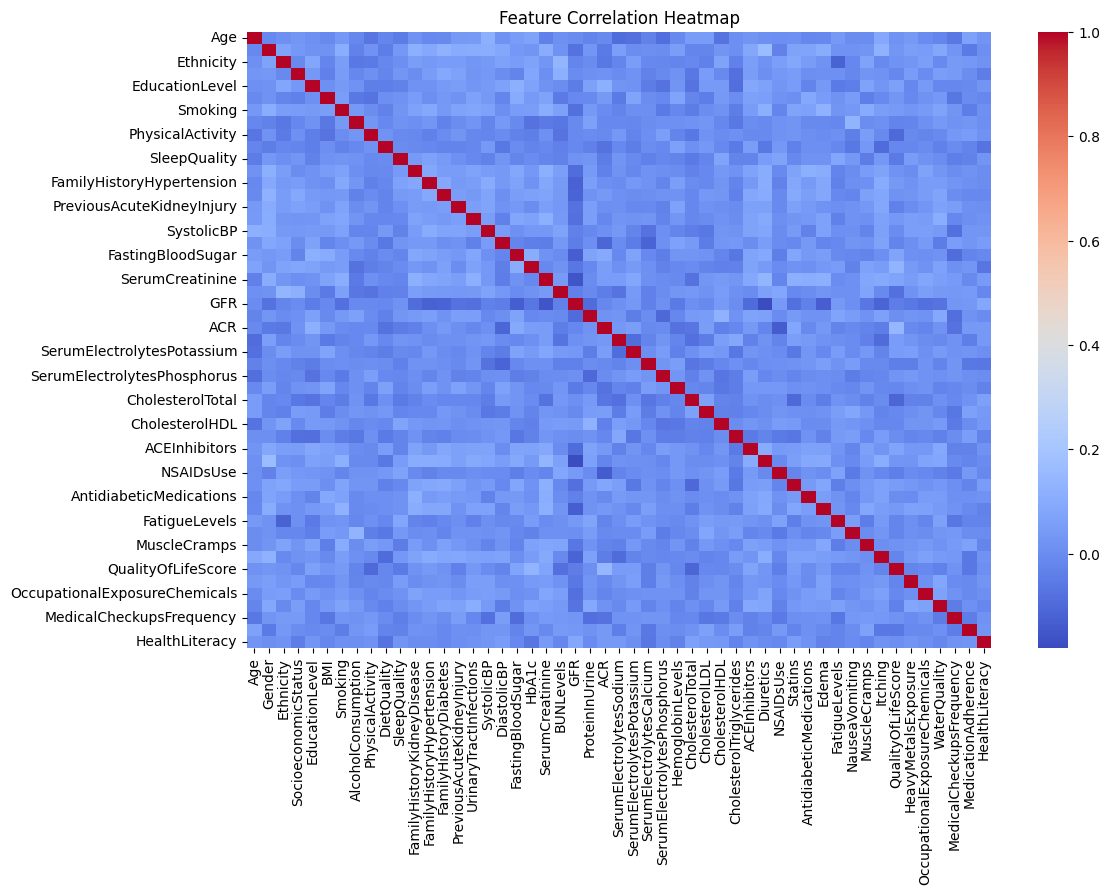

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Seleksi Fitur

In [ ]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_temp.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

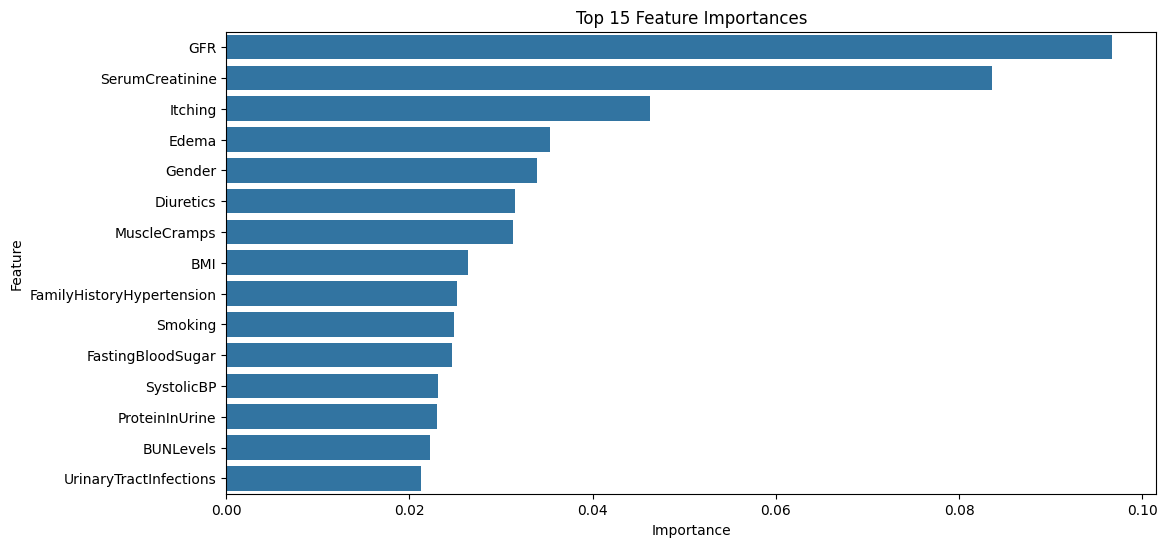

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title("Top 15 Feature Importances")
plt.show()

# 4. Modeling

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Evaluasi Model

In [ ]:
# Predict and evaluate
y_pred = rf.predict(X_test)

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       305
           1       0.98      0.98      0.98       305

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[300   5]
 [  6 299]]


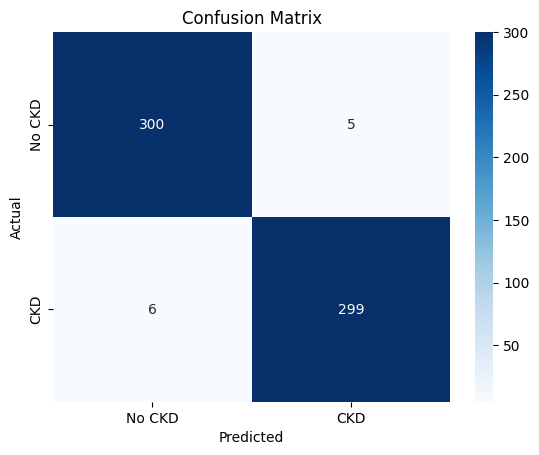

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
